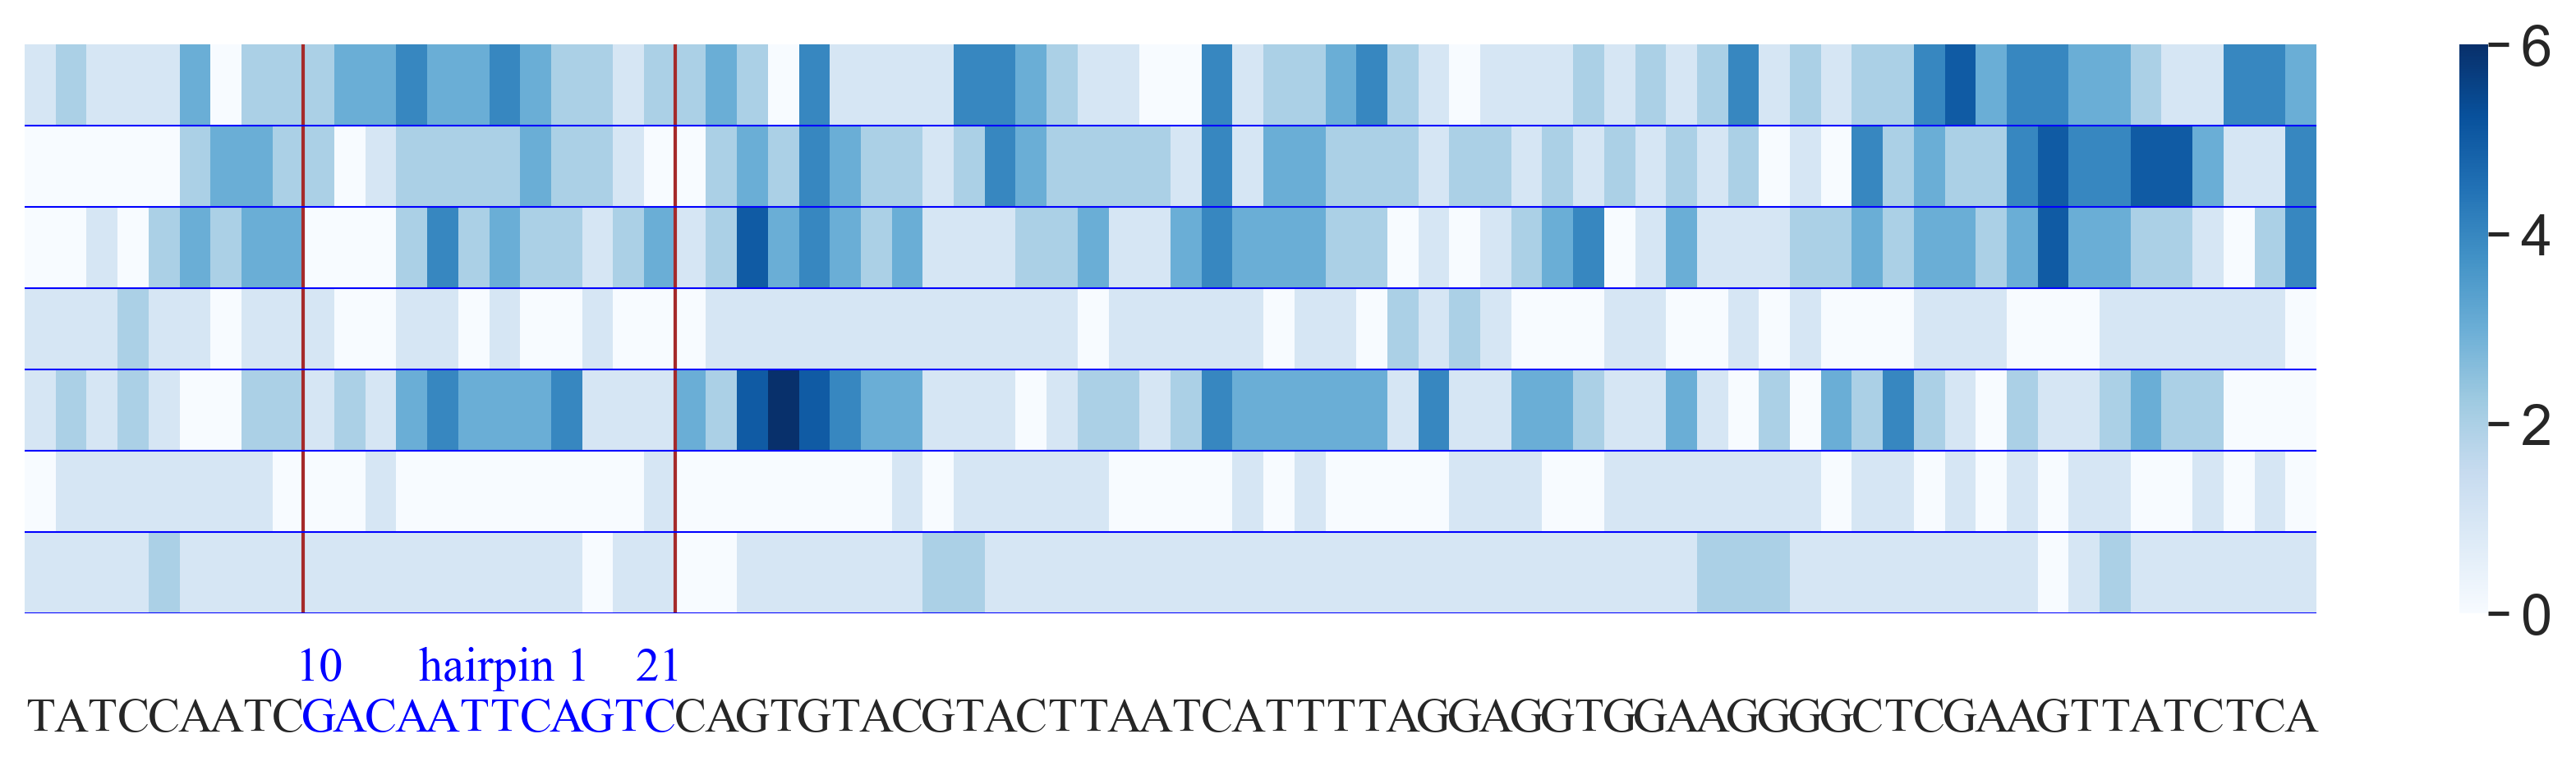

In [1]:
import math
import seaborn as sns
import matplotlib.pyplot as plt
seq='TATCCAATCGACAATTCAGTCCAGTGTACGTACTTAATCATTTTAGGAGGTGGAAGGGGCTCGAAGTTATCTCA'

seqlis = ["\n"+ i for i in seq]

seqlis[9]="10\nG"
seqlis[20]="21\nC"

seqlis[15]="hairpin 1\nT"

file_xvg = ['0-f5a_f5a_beads_bas.xvg','0-hnp_hnp_beads_bas.xvg','0-f5a_f5amg_beads_bas.xvg','0-mg_f5amg_beads_bas.xvg',\
            '0-hnp_hnpmg_beads_bas.xvg','0-mg_hnpmg_beads_bas.xvg','0-mg_tdnarmg_beads_bas.xvg']

def getstr(path):
    with open(path,'r') as file:
        content = file.readlines()
        strength = []
        std = []
        for line in content:
            strength.append(round(eval(line.split()[1])))
            std.append(eval(line.split()[2]))
        return [strength,std]

all_str = []
all_std = []
for path in file_xvg:
    all_str.append(getstr(path)[0])
    all_std.append(getstr(path)[1])

y_ticks = ['','','','','','','']

x_ticks = seqlis

dp = 300

plt.figure(figsize=(15,3),dpi=dp)
sns.set(font_scale=1.5)
cmap = 'Blues'

ax = sns.heatmap(all_str, xticklabels=x_ticks, yticklabels=y_ticks,cmap=cmap,vmin=0,vmax=6)

plt.xticks(fontsize=14,fontfamily='Times New Roman',rotation=0)

for i in range(9,21):
    ax.get_xticklabels()[i].set_color("blue")


plt.yticks(fontsize=14,fontfamily='Times New Roman')

c ='brown'

wid = 1

sns.lineplot(x=[9,9],y=[0,7],color=c,linewidth=wid,estimator=None)
sns.lineplot(x=[21,21],y=[0,7],color=c,linewidth=wid,estimator=None)

for i in range(9):
    sns.lineplot(x=[0,74],y=[i+1,i+1],color='blue',linewidth=0.5,estimator=None)

plt.savefig('DNAr_dpi300.tiff', dpi=dp,bbox_inches='tight')

# 显示图表
plt.show()


[1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1]
[158, 0, 150, 13, 150, 52, 3, 147, 35, 7, 77]


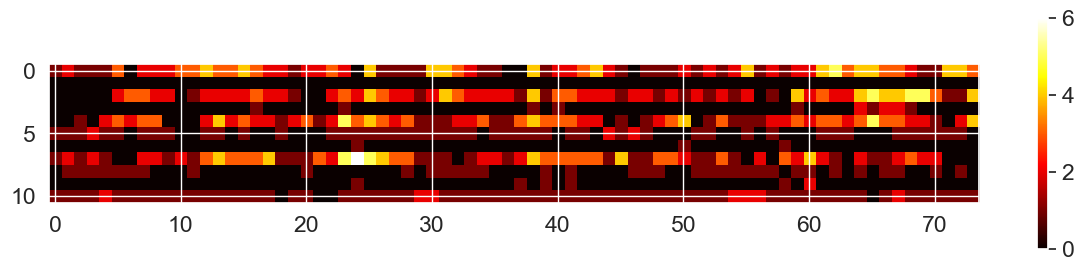

In [17]:
##计算与DNA整体结合的所以的beads的数量
num = [sum(tar) for tar in all_str]
print(all_str[-1])
print(num)
# 创建热力图
fig, ax = plt.subplots()
cmap = 'hot'  # 设置渐变色为蓝色渐变
im = ax.imshow(all_str, cmap=cmap)
 
# 显示色条
fig.colorbar(im, ax=ax)
plt.gcf().set_size_inches(15, 3) 
 
plt.show()


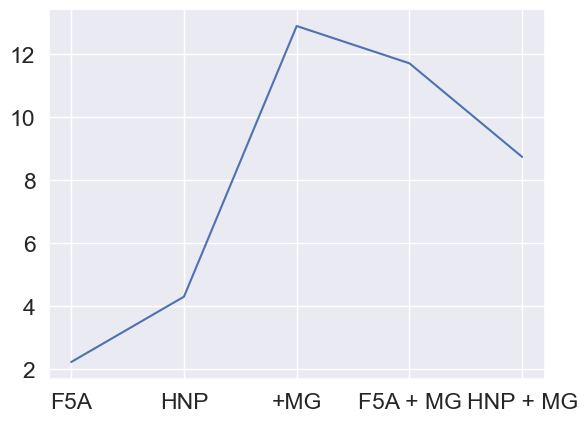

In [2]:
# file_xvg = ['02-f5a_f5a_strength.xvg','02-ala_f5a_strength.xvg','02-hnp_hnp_strength.xvg','02-phe_hnp_strength.xvg','02-f5a_f5amg_strength.xvg','02-mg_f5amg_strength.xvg','02-ala_f5amg_strength.xvg',\
#             '02-hnp_hnpmg_strength.xvg','02-mg_hnpmg_strength.xvg','02-phe_hnpmg_strength.xvg','02-mg_tdnaomg_strength.xvg']


pathnopep = [['02-f5a_f5a_strength.xvg'],['02-hnp_hnp_strength.xvg'],['02-mg_tdnarmg_strength.xvg'],['02-f5a_f5amg_strength.xvg','02-mg_f5amg_strength.xvg'],\
             ['02-hnp_hnpmg_strength.xvg','02-mg_hnpmg_strength.xvg']]#,['01-mg_tdnadmg.xvg'],['01-ala_f5amg.xvg','01-mg_f5amg.xvg'],['01-phe_phemg.xvg','01-mg_phemg.xvg']]

def readfile(path):
    with open(path,'r') as file:
        content = file.readlines()
        lis = []
        for lin in content:
            if eval(lin.split()[1]) >=5:
                lis.append(eval(lin.split()[2]))
            else:
                lis.append(0)
        
    return [1-math.exp(-x) for x in lis]

allis = []
for patlis in pathnopep:
    onelis = []
    for pat in patlis:
        onelis.append(readfile(pat))
    allis.append(sum([sum(x) for x in onelis]))

x = ['F5A','HNP','+MG','F5A + MG','HNP + MG',]

plt.plot(x,allis)